<a href="https://colab.research.google.com/github/Kristyyy/Machine-Learning-Project/blob/master/Kristy_LogisticRegression_when_people_are_going_to_leave_a_company_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Author: Fang Jung(Kristy) Lin 
## Purpose: Logistic Regression Analysis - when people are going to leave a company

# Import necessary packages

In [0]:
import numpy as np
import pandas as pd
import random
import os

from matplotlib import pyplot as plt
import pylab as pl
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
import seaborn as sns

import statsmodels.api as sm
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Purpose for the analysis


*   Use logistic regression to predict when people are going to leave a company
*   Determine the causes for attrition



# Part1. Data Acquisition and Exploration

### Data Acquisition
The actual path to downloadable CSV is: https://docs.google.com/spreadsheets/d/e/2PACX-1vRUVTb-0e25b26erapAKP8qe81gfbxOmvC9-pbG30HwnFdbVJesU2Ib3FDa22qSBxYoYJXZcP0GZhQo/pub?gid=679035017&single=true&output=csv

Read data from Google sheet and explore the data frame

In [0]:
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRUVTb-0e25b26erapAKP8qe81gfbxOmvC9-pbG30HwnFdbVJesU2Ib3FDa22qSBxYoYJXZcP0GZhQo/pub?gid=679035017&single=true&output=csv'
my_df = pd.read_csv(data_path)

my_df.head(3)

,emp_sat,last_perf,workload,avg_montly_hours,tenure_years,ergo_issues,attrit,promo_in_last_5,dept,sal,rand
0,0.82,0.97,3,244,5,0,0,0,SALES,MEDIUM,0.249721
1,0.75,0.81,2,247,4,0,0,0,HR,SMALL,0.249735
2,0.54,0.81,4,257,2,0,0,0,ADMIN,SMALL,0.249741


### Interpret the data

In [0]:
list(my_df)

['emp_sat',
 'last_perf',
 'workload',
 'avg_montly_hours',
 'tenure_years',
 'ergo_issues',
 'attrit',
 'promo_in_last_5',
 'dept',
 'sal',
 'rand']

Dataset Interpretion:
* emp_sat: Employee level of satisfaction (0-1)
* last_perf: The last performance score of employee (0-1)
* workload: The amount of work to be done
* avg_montly_hours: Average monthly hours at workplace
* tenure_years: Number of years spent in the workplace
* ergo_issues: Whether the employee had a workplace accident (0,1)
* attrit: Whether the employee left the workplace (0,1)
* promo_in_last_5: Whether the employee was promoted in the last five years (0,1)
* dept: Department in which employee work for
* sal: Relative level of salary (small, medium, large)
* rand: Random number assigned to the employee (for sorting)














### Data Preprocessing

Check both the datatypes and if there are missing values

In [0]:
print('Datatype:\n', my_df.dtypes)
print('Missing values:\n', my_df.isnull().any())

Datatype:
 emp_sat             float64
last_perf           float64
workload              int64
avg_montly_hours      int64
tenure_years          int64
ergo_issues           int64
attrit                int64
promo_in_last_5       int64
dept                 object
sal                  object
rand                float64
dtype: object
Missing values:
 emp_sat             False
last_perf           False
workload            False
avg_montly_hours    False
tenure_years        False
ergo_issues         False
attrit              False
promo_in_last_5     False
dept                False
sal                 False
rand                False
dtype: bool


Remove unnecessary column

In [0]:
my_df = my_df.drop(columns = ['rand'])
my_df.head(1)

,emp_sat,last_perf,workload,avg_montly_hours,tenure_years,ergo_issues,attrit,promo_in_last_5,dept,sal
0,0.82,0.97,3,244,5,0,0,0,SALES,MEDIUM


### Explore the relationship among attrit and other numeric variables
Try to find the relation between attrit and other numeric variables

In [0]:
my_df.describe()

,emp_sat,last_perf,workload,avg_montly_hours,tenure_years,ergo_issues,attrit,promo_in_last_5
count,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000,11249.000000
mean,0.612957,0.716225,3.799716,201.176727,3.499600,0.144991,0.239577,0.021869
std,0.248235,0.171378,1.232190,50.058105,1.469892,0.352107,0.426844,0.146261
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,201.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### From the table above, it provides useful information:
*   Approximately 24% of the employees have left the firm, which is quite a huge loss to the company.
*   On an average the employees got a score of 0.71 which is quite good and the standard deviation is low. Even though the high evaluation score look good, the high attrition rate might imply that there may be other reasons that lead to the attrition of employee.
*   There are only few exployee got promotion and had work accident, they may not be the factors of employee attrition.
*   The satisfaction of employee is only 0.61, which is relatively low. We need to dig more into it to find out if there is relation with attrition.





### Explore the data for only those who left the firm

In [0]:
attrit_df = my_df[my_df['attrit']==1]
attrit_df.describe()

,emp_sat,last_perf,workload,avg_montly_hours,tenure_years,ergo_issues,attrit,promo_in_last_5
count,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.0,2695.000000
mean,0.441080,0.719837,3.863451,208.086456,3.881633,0.048237,1.0,0.004082
std,0.264924,0.197608,1.812862,61.118062,0.976571,0.214307,0.0,0.063769
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.120000,0.520000,2.000000,147.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,226.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


#### The table shows some information about the employees who left the company:
*   The employees who left the firm have performed marginally better than the average employee, which is quite weird we need more exploration.
*   These employees have a much less level of satisfaction.
*   Other factors seem quite balanced, these employees:
      1.   Spent almost the same amount of time each day in the office.
      2.   Were alloted equally as many projects as everyone else.
      3.   Spent almost the same years at the workplace as everyone else.
      4.   The propotion of work accident and promotion are still low, do not have big impact on attrition.

So the level of satisfaction might be the single most important factor in predicting employee attrition, this follows from common sense and is also consistent with our findings.

### Visualize the data to find out how differently are the last performance scores of the two groups (stay or attrit) distributed 

Text(0.5, 1.0, 'KDE of two groups last performance scores')

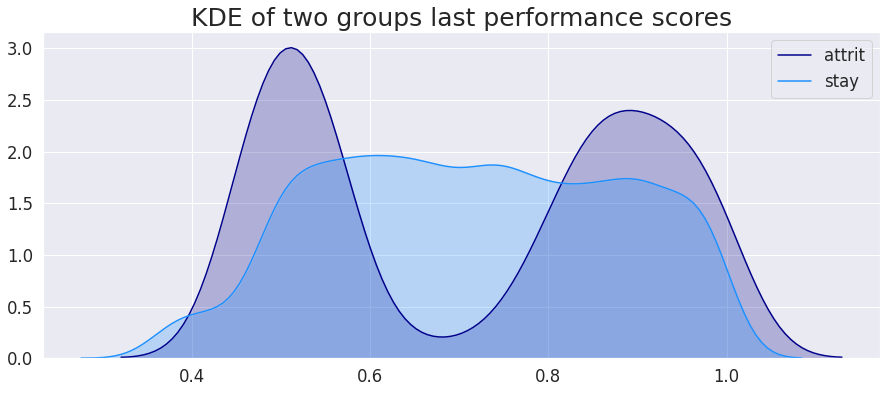

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
asx = my_df[my_df['attrit']==1]
ax = sns.kdeplot(data=asx['last_perf'],color='darkblue', shade=True, label='attrit')
asd = my_df[my_df['attrit']==0]
ax = sns.kdeplot(data=asd['last_perf'],color='dodgerblue', shade=True, label='stay')
ax.set_title('KDE of two groups last performance scores', fontsize=25)

#### From the KDE plot, we can find:
*   Employees who attrited are either those who performed poorly or performed highly, those in the middle are very few.
*   Employees who stayed are those who performed on the average.

#### Here are my assumptions:
1.   We can first assume that the reason for the high score employees who left the company may be arison from their workload. The workload may be too much for them. Also, they may perform very well and are talented, some other companies are willing to give them higher salary, so they choose to leave the company to choose the more brilliant future. We still need more exploration.

2.   We also can assume that the reason for the low score employees who left the company may be arison from their poor performance, they cannot get the sense of accomplishment from the job, so they choose to leave the company. Also, their workload may be little, they got boried from the job, so they choose to leave which we also need more exploration.



### Correlation between all numeric variables

Plot the heat map to show correlation between each variable

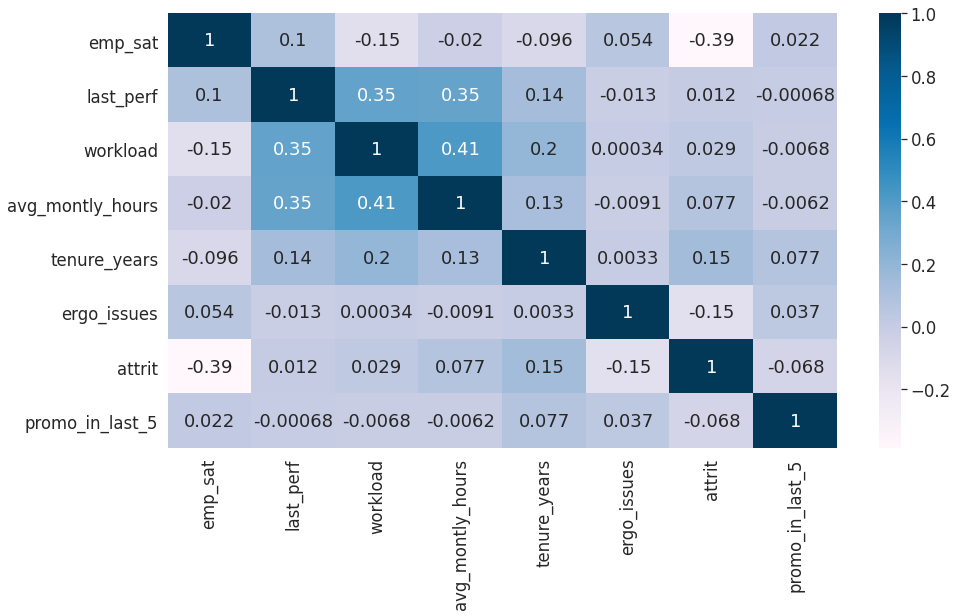

In [0]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
sns.heatmap(my_df.corr(), annot=True, cmap = 'PuBu')
plt.xticks(rotation=90)
plt.show()

#### From the heat map, we can find:


*   The workload and the average monthly hours worked by an employee and their last_perf are positively co-related.
*   The level of satisfaction and 'attrit' variables are negatively co-related which further leads evidence to our previous hypothesis.
*   Other than those none of the features show a co-relation high enough to mean something. 

#### Here, we can confirm some facts that we have assumed previously.

1.   Employees who left the company have lower employee satisfaction.
2.   Employees who left the company with higher performance scores has more workload and average monthly working hours.
3.   Employees who left the company with lower performance scores has less workload and average monthly working hours.

We still need to confirm the satisfaction level with employees with different performance scores to make the final conclusion.


### Explore the insight of satisfaction level and performance score for the employees who attrited and stayed

From the previous analysis, we find that employee who attrited has lower satisfaction level and a higher or lower performance.

Let's have a deeper look into it, to find out if the high performance scores employees who left the company also have the lower satisfaction level.

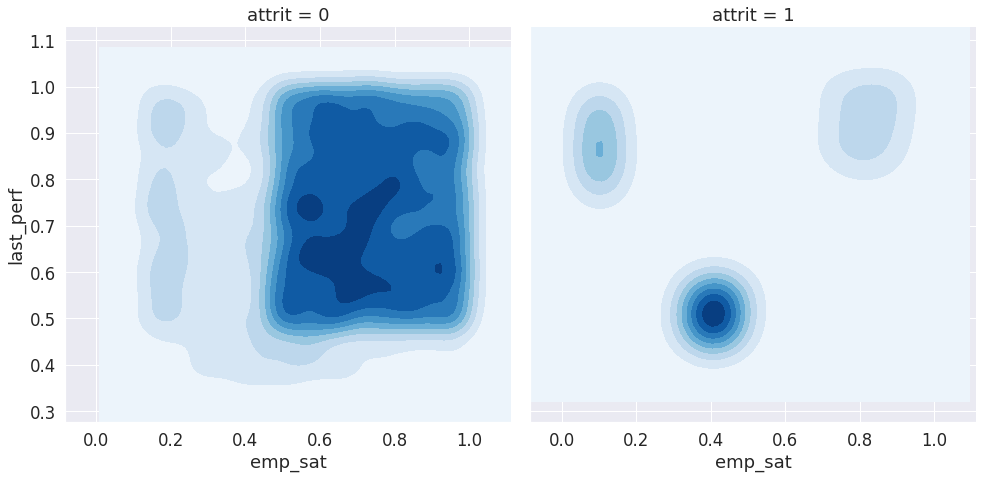

In [0]:
sns.set_style('darkgrid')
plot = sns.FacetGrid(my_df, col='attrit', hue='attrit', height=7)
plot.map(sns.kdeplot, 'emp_sat', 'last_perf', shade=True, cmap='Blues')
plt.show()

#### From the result, we find that the employees who left the company belong to three clusters


*   Less satisfied and under performance - which counts for the majority employee who left.
*   Less satisfied and above average performance.
*   Highly satisfied and Above-average performance.

#### From my previous assumption, now we can make the conclusion:

1.   It's no doubt that employee with low performance scores and satisfaction choose to leave the company.
2.   The reason that employees who left the company with high performance score and less satisfaction may be caused from higher workload and working hours. Even though they got the high performance score, they are not satisfied with the situation or maybe they have the better opportunity. Hence, they choose to leave the company.
3.   The third group employees with high performance scores and satisfaction level choose to leave really make me curious. As usual, if we have a high satisfaction we won't leave the company. They must have a bright future in the company, why they still choose to leave?

      Here is my guess, maybe they are being headhunted by a large company and get a higher pay. Let's take a deeper look to find out if salary can influence attrition and are the employees who left the company with higher performance score and high satisfaction get lower pay.

### Explore the relation among attrit, salary and department

#### Find the propotion of attrition of different salary level


Text(0, 0.5, 'Salary Level')

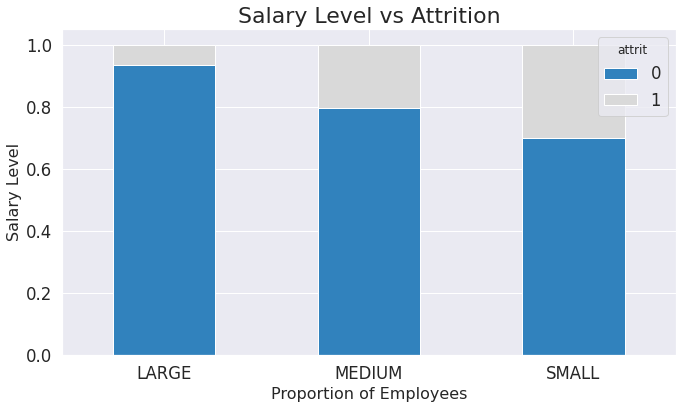

In [0]:
table = pd.crosstab(my_df.sal, my_df.attrit)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, colormap = 'tab20c', figsize=(11,6))
pl.xticks(rotation=360)
plt.title('Salary Level vs Attrition', fontsize=22)
plt.xlabel('Proportion of Employees', fontsize=16)
plt.ylabel('Salary Level', fontsize=16)

attrit and Sal


*   The proportion of the employees attrition depend a great deal on their salary level; hence, salary level can be a good predictor in predicting the outcome.
*   Small salary level employees have the highest probability to quit the job.


#### Find the frequency of attrition of department that employees work for 




Text(0, 0.5, 'Frequency of Attrition')

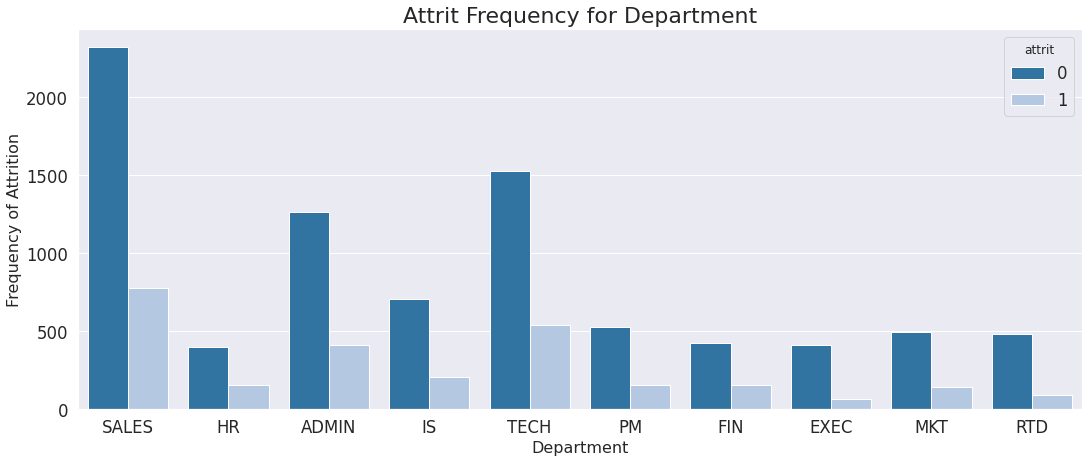

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,7))
ax = sns.countplot(x = 'dept', hue = 'attrit', data = my_df, palette = 'tab20')
ax.set_title('Attrit Frequency for Department', fontsize=22)
ax.set_xlabel('Department', fontsize=16)
ax.set_ylabel('Frequency of Attrition', fontsize=16)

attrit and dept


*   It is evident that the frequency of employees attrition depends a great deal on the department they work for. Thus, department can be a good predictor of the outcome variable.
*   The sales department has seen the highest level of attrition.

#### Find out if salary is the critical factors for the employees who left the company with high performance score and high satisfaction

Text(0, 0.5, 'Number of employee who left')

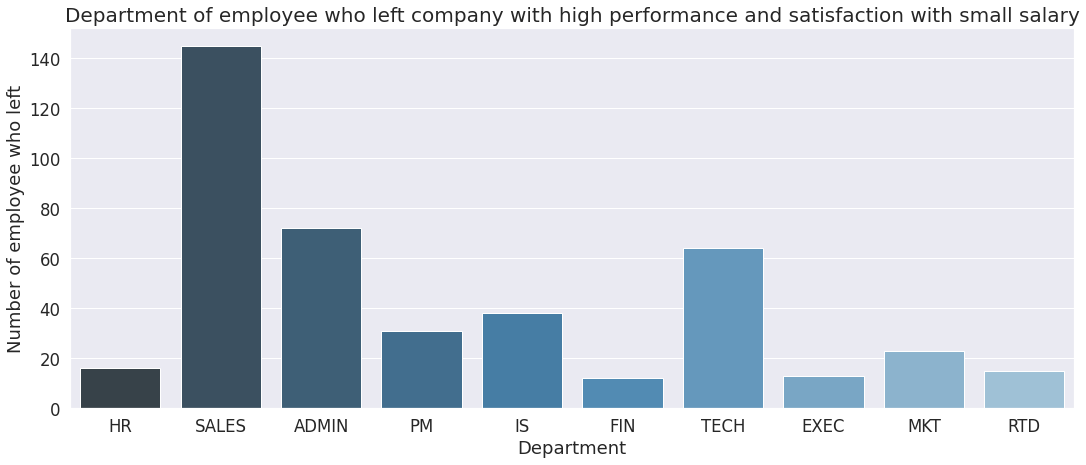

In [0]:
third_df = attrit_df[[all([a,b]) for a,b in zip(attrit_df['last_perf'] > my_df['last_perf'].mean(), attrit_df['emp_sat'] > my_df['emp_sat'].mean())]]

third_low_df = third_df.loc[third_df.sal == 'SMALL']
sns.set_style('darkgrid')
plt.figure(figsize=(18,7))
ax = sns.countplot(third_low_df.dept, palette = 'Blues_d')
plt.xticks(rotation=360)
ax.set_title('Department of employee who left company with high performance and satisfaction with small salary', fontsize = 20)
ax.set_xlabel('Department')
ax.set_ylabel('Number of employee who left')

#### From the analysis above, we can find:

*   Within the employees left with high performance and high satisfied, the sales employees show the highest (and by a huge margin) number of people who earned low salaries, hence the high attrition.

## Summary above exploration


Employees' attrition can be caused by 


1.   Employee satisfaction 

  *   The lower the satisfaction the higher propotion to leave the company

2.   Performance score - we can seperate it to three groups

  *   Under performance and less satisfied - which counts for the majority employee who left. The result came up as our expectation.
  *   Above average performance and less satisfied. 
  
      We have found that employees with higher performance score have more workload and higher average monthly hours at the workplace. They may feel tired and unfair about their work so they choose to leave the company. 

  *   Above-average performance and highly satisfied.

       This make me curios. However, from the analysis, we can conclude that the employees who left the company with high performance score and satisfaction have lower salary. They may choose to go to the company with higher pay.

3.   Salary

  *   The lower the salary, the higher propotion to leave the company.


4.   Department

  *   Sales department has the highest propotion to leave the company.


### Let's take a look on the regression result of these variables

From the analysis above, I choose below five variables to see the outcome

*   emp_sat
*   last_perf
*   workload
*   dept
*   sal


In [0]:
le = LabelEncoder()

my_df['dept']= le.fit_transform(my_df['dept'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
my_df['sal']= le.fit_transform(my_df['sal'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

X_cols = ['emp_sat', 'last_perf', 'workload', 'dept', 'sal']

X = my_df[X_cols].values

data_length = len(my_df)
column_length = len(my_df[X_cols].columns)

X = X.reshape(data_length,column_length)
y = my_df['attrit'].values
y = y.reshape(data_length,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

listing_y_pred = lin_reg.predict(X_test)

print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

print('Intercept:', float(lin_reg.intercept_))

coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

{'ADMIN': 0, 'EXEC': 1, 'FIN': 2, 'HR': 3, 'IS': 4, 'MKT': 5, 'PM': 6, 'RTD': 7, 'SALES': 8, 'TECH': 9}
{'LARGE': 0, 'MEDIUM': 1, 'SMALL': 2}
   y_prediction
0     -0.031279
1      0.183032
2     -0.022030
3      0.426897
4      0.191162

Intercept: 0.462108266824891
    emp_sat  last_perf  workload      dept       sal
0 -0.681058   0.166013 -0.017321  0.002296  0.095022

Mean Squared Error (MSE):0.15
Variance Score (R^2):0.17


### Outcome of regression result 

From the analysis above, mean Squared error is 0.15, which looks good. However, the Variance score is low. It means that using linear regression approach maybe underfiited and unsuitable.

Let's take a look on logistic regression result. To find out if we can find the better correlation to predict the attrition!

# Part2. Logistic Regression

### Data Preprocessing

Preprocessing data for the model, I choose below five variables as my prediction of attrition.

*   emp_sat
*   last_perf
*   workload
*   dept
*   sal

As 'dept' and 'sal' are not numeric values, I use labelencoder to transform them



In [0]:
X = my_df.drop(['avg_montly_hours', 'tenure_years', 'ergo_issues', 'attrit', 'promo_in_last_5'], axis=1)
y = my_df['attrit']
le = LabelEncoder()

X['dept']= le.fit_transform(X['dept'])
X['sal']= le.fit_transform(X['sal'])

### Using sklearn's implementation of logistic regression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

Initialize Logistic Regressor and fit the model

In [0]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Score the model

In [0]:
model.score(X_test, y_test)

0.7966583718450053

In [0]:
X_test

,emp_sat,last_perf,workload,dept,sal
8543,0.87,0.89,4,9,0
8414,0.73,0.58,5,8,2
11164,0.94,0.57,3,8,1
447,0.48,0.87,3,4,2
4365,0.74,0.67,5,8,2
...,...,...,...,...,...
8750,0.15,0.53,4,8,2
2639,0.59,0.62,3,9,1
6888,0.86,0.92,5,7,2
9649,0.58,0.74,4,8,2


### Get predictions for the test set.
Each value corresponds to attrition outcome of 0 (No) or 1 (Yes)

In [0]:
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

### Taka a look on MSE

In [0]:
mean_squared_error(y_test, pred)

0.20334162815499468

### Take a look at the probabilities of each record.

The structure below has two data points per record.

*   The first data point contains the probability of this record NOT attrition
*   The second data point contains the probability of this record POSITIVELY attrition

In [0]:
model.predict_proba(X_test)

array([[0.95835066, 0.04164934],
       [0.85830681, 0.14169319],
       [0.95165716, 0.04834284],
       ...,
       [0.87600105, 0.12399895],
       [0.70001865, 0.29998135],
       [0.86876748, 0.13123252]])

#### Take a look at the actuals, predictions, and probabilities

In [0]:
prediction_df = pd.DataFrame(model.predict(X_test), columns = {'Prediction'}).set_index([pd.Index(X_test.index)])
probability_df = pd.DataFrame(model.predict_proba(X_test)).set_index([pd.Index(X_test.index)])
all_together_df = X_test.join(y_test).join(prediction_df).join(probability_df)
all_together_df.head(3)

,emp_sat,last_perf,workload,dept,sal,attrit,Prediction,0,1
8543,0.87,0.89,4,9,0,0,0,0.958351,0.041649
8414,0.73,0.58,5,8,2,0,0,0.858307,0.141693
11164,0.94,0.57,3,8,1,0,0,0.951657,0.048343


### Summary the performance of the prediction

*  The score of the prediction is 0.7967%

*  The mean square error of the prediction is 0.2, which I think is acceptable. Even though it's a little higher than the MSE of linear regression model.

*  Though the score is not really high, the prediction and the probability seem reasonable.

*  I think logistic regression is a good way for this analysis.

Let's predict more to find out the performance of the outcome!



### Use the model to predict attrition for arbitray values

From the previous transformation, we got...

*   Department

  {'ADMIN': 0, 'EXEC': 1, 'FIN': 2, 'HR': 3, 'IS': 4, 'MKT': 5, 'PM': 6, 'RTD': 7, 'SALES': 8, 'TECH': 9}



*   Salary

  {'LARGE': 0, 'MEDIUM': 1, 'SMALL': 2}


#### Let's take a look at employees who have low performance and low satisfaction with small salary, and medium workload in different department.

In [0]:
sat_values1 = pd.DataFrame(data = {'emp_sat': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], 'last_perf': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], 'workload': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'dept': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'sal': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]})
sat_values1.join(pd.DataFrame(model.predict(sat_values1), columns = {'Prediction'}).set_index([pd.Index(sat_values1.index)]))

,emp_sat,last_perf,workload,dept,sal,Prediction
0,0.2,0.2,4,0,2,0
1,0.2,0.2,4,1,2,0
2,0.2,0.2,4,2,2,0
3,0.2,0.2,4,3,2,1
4,0.2,0.2,4,4,2,1
5,0.2,0.2,4,5,2,1
6,0.2,0.2,4,6,2,1
7,0.2,0.2,4,7,2,1
8,0.2,0.2,4,8,2,1
9,0.2,0.2,4,9,2,1


#### Let's take a look at employees who have low performance and low satisfaction with large salary, and medium workload in different department.

In [0]:
sat_values2 = pd.DataFrame(data = {'emp_sat': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], 'last_perf': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], 'workload': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'dept': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'sal': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]})
sat_values2.join(pd.DataFrame(model.predict(sat_values2), columns = {'Prediction'}).set_index([pd.Index(sat_values2.index)]))

,emp_sat,last_perf,workload,dept,sal,Prediction
0,0.2,0.2,4,0,0,0
1,0.2,0.2,4,1,0,0
2,0.2,0.2,4,2,0,0
3,0.2,0.2,4,3,0,0
4,0.2,0.2,4,4,0,0
5,0.2,0.2,4,5,0,0
6,0.2,0.2,4,6,0,0
7,0.2,0.2,4,7,0,0
8,0.2,0.2,4,8,0,0
9,0.2,0.2,4,9,0,0


#### Let's compare two scenarios in sales department employees

low satisfaction, high performance score with...

*   high workload and low salary
*   high workload and high salary


In [0]:
sat_values3 = pd.DataFrame(data = {'emp_sat': [0.2, 0.2], 'last_perf': [0.8, 0.8], 'workload': [7, 7], 'dept': [8, 8], 'sal': [0, 2]})
sat_values3.join(pd.DataFrame(model.predict(sat_values3), columns = {'Prediction'}).set_index([pd.Index(sat_values3.index)]))

,emp_sat,last_perf,workload,dept,sal,Prediction
0,0.2,0.8,7,8,0,0
1,0.2,0.8,7,8,2,1


#### Let's compare two scenarios in sales department employees

high satisfaction, high performance score with...

*   high workload and low salary
*   high workload and high salary



In [0]:
sat_values4 = pd.DataFrame(data = {'emp_sat': [0.8, 0.8], 'last_perf': [0.8, 0.8], 'workload': [7, 7], 'dept': [8, 8], 'sal': [0, 2]})
sat_values4.join(pd.DataFrame(model.predict(sat_values4), columns = {'Prediction'}).set_index([pd.Index(sat_values4.index)]))

,emp_sat,last_perf,workload,dept,sal,Prediction
0,0.8,0.8,7,8,0,0
1,0.8,0.8,7,8,2,0


# Summary 

From the prediction above, we find that...


1.   Employees who have low performance and low satisfaction and have small salary, medium workload in different department will leave the job 
  
  --> the result of prediction is quite corresponding to the previous exploration.

2.   Employees who have low performance and low satisfaction and have large salary, and medium workload in different department will not leave the job 

  --> the result of prediction is corresponding to the previous exploration too. We have found that the higher the salary, the lower rate employees will leave the job

3.   Employees in sales department that have low satisfaction, high performance score with...

 * high workload and low salary will leave the job

       -->  corresponding to the previous exploration

 * high workload and high salary will not leave the job

       -->  corresponding to the previous exploration


4.   Employees in sales department that have high satisfaction, high performance score with...

    * high workload and low salary will not leave the job

       -->  Do not correspond to the previous exploration. From the previous exploration, we found that even though they have high satisfaction and performance, if their salary are samll, they will choose to leave. There are two reasons to explain the result.

         I. The propotion of employees who choose to leave the company with high satisfaction and high performance but small salary  is small, hence the prediction will not show it

         II. The model we use for prediction is not accurate enough.

    * high workload and high salary will not leave the job

      -->  corresponding to the previous exploration



## How would the above influence company strategy to retain the talented employees?


#### Take a look on all together dataframe

In [0]:
prediction_df = pd.DataFrame(model.predict(X_test), columns = {'Prediction'}).set_index([pd.Index(X_test.index)])
probability_df = pd.DataFrame(model.predict_proba(X_test)).set_index([pd.Index(X_test.index)])
all_together_df = X_test.join(y_test).join(prediction_df).join(probability_df)
all_together_df.head(3)

,emp_sat,last_perf,workload,dept,sal,attrit,Prediction,0,1
8543,0.87,0.89,4,9,0,0,0,0.958351,0.041649
8414,0.73,0.58,5,8,2,0,0,0.858307,0.141693
11164,0.94,0.57,3,8,1,0,0,0.951657,0.048343


#### Plot the result of employee satisfaction

(0.0, 1.0)

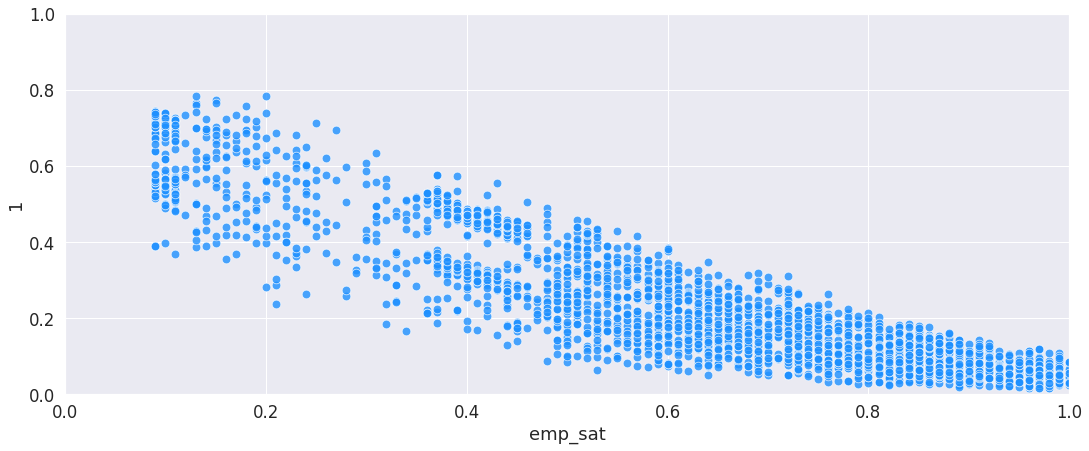

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,7))
ax = sns.scatterplot(x = 'emp_sat', y = 1, data = all_together_df, s = 75, color = 'dodgerblue', alpha = 0.8)
plt.xlim([0,1])
plt.ylim([0,1])

#### Relation between employees satisfaction and attrition

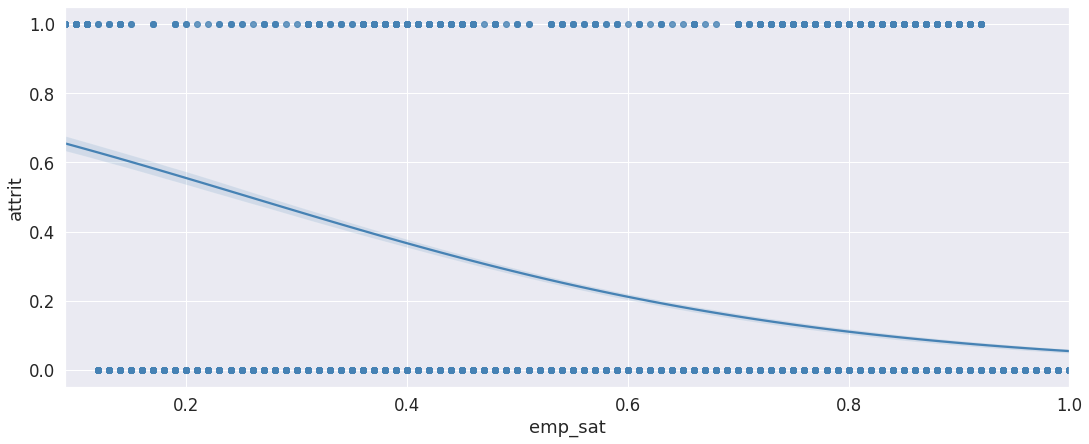

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,7))
sns.regplot(x = 'emp_sat', y = 'attrit', data = my_df, logistic = True, color = 'steelblue') 

#### Plot the result of employee salary

*   Salary

  {'LARGE': 0, 'MEDIUM': 1, 'SMALL': 2}

(0.0, 1.0)

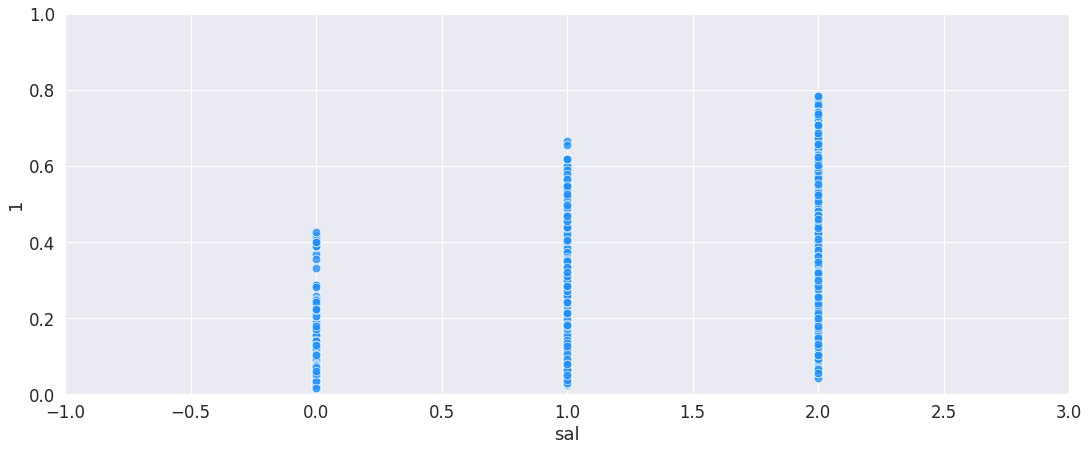

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,7))
ax = sns.scatterplot(x = 'sal', y = 1, data = all_together_df, s = 75, color = 'dodgerblue', alpha = 0.8)
plt.xlim([-1,3])
plt.ylim([0,1])

{0: 0, 1: 1, 2: 2}


(-0.5, 1.5)

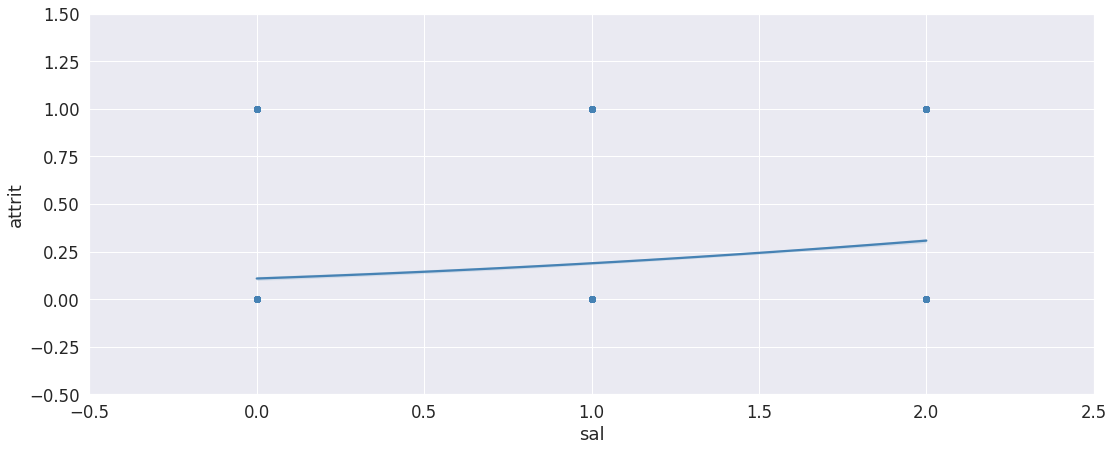

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,7))
le = LabelEncoder()
my_df['sal']= le.fit_transform(my_df['sal'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
sns.regplot(x = 'sal', y = 'attrit', data = my_df, logistic = True, color = 'steelblue')
plt.xlim([-0.5,2.5])
plt.ylim([-0.5,1.5]) 

# Conclusion

*   If the company hope to retain employees, it needs to improve employee satisfactions. Maybe it can hold some campaigns to improve the relationship between company and employees, or properly assign the workload for everyone. Especially those who have high performance but low satisfaction, company must try to retain those talented employees!

*   If possible, raise the salary for high performance employees is important. The higher the salary, the lower chance employees leave the job. From the analysis above, we found that employees with high performance still choose to leave the job because of small salary. If company really hope to retain high talented employees, it should raise the salary for them. All people need encouragement, sometimes give some benefit to employees they will feedback the company more than expected. 

